# Tarea 2


MA5203 - Aprendizaje de Máquinas Probabilístico

Profesor: Felipe Tobar

Autor: Martín Cornejo

## Paquetes necesarios

In [1]:
import numpy as np
import scipy.optimize as opt
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import pdb

# P1 Regresión No Lineal

In [2]:
data = np.genfromtxt('datosT2.txt', delimiter=' ')
x = data[:,0]
y = data[:,1]

# dividimos train y test en 75 y 25% respectivamente
x_tr = x[0:108];
y_tr = y[0:108];

x_te = x[108:144];
y_te = y[108:144];

### i) 
A continuación se grafica la data:

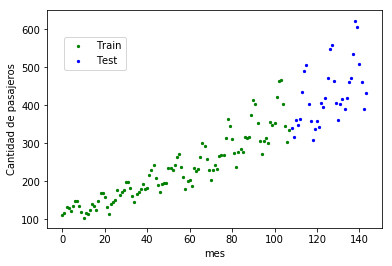

In [3]:
#mpl.rcParams['figure.figsize'] = (4, 2)
plt.figure()
plt.scatter(x_tr,y_tr, c ='g', s=5)
plt.scatter(x_te,y_te, c ='b', s=5)
#plt.title("Cantidad mensual de pasajeros en aerolínea")
plt.xlabel("mes")
plt.ylabel("Cantidad de pasajeros")
plt.legend(["Train","Test"], bbox_to_anchor=(0.25, 0.9))
plt.savefig('train_test_data.pdf')

### ii) 

Theta polyfit:  [-1.18743830e-06  3.01531344e-04 -1.32322905e-02  1.96383281e+00
  1.14924262e+02]
Theta formula:  [-2.25152592e-06  5.55780800e-04 -3.37386185e-02  2.59411113e+00
  1.09269263e+02]
Theta polyfit:  [-1.18743830e-06  3.01531344e-04 -1.32322905e-02  1.96383281e+00
  1.14924262e+02]
Theta formula:  [-2.25152592e-06  5.55780800e-04 -3.37386185e-02  2.59411113e+00
  1.09269263e+02]

Theta polyfit:  [-1.18743830e-06  3.01531344e-04 -1.32322905e-02  1.96383281e+00
  1.14924262e+02]
Theta formula:  [-2.25152592e-06  5.55780800e-04 -3.37386185e-02  2.59411113e+00
  1.09269263e+02]
El error cuadratico del train es: 119859.20004103855

Theta polyfit:  [-1.18743830e-06  3.01531344e-04 -1.32322905e-02  1.96383281e+00
  1.14924262e+02]
Theta formula:  [-2.25152592e-06  5.55780800e-04 -3.37386185e-02  2.59411113e+00
  1.09269263e+02]
El error cuadratico del test es: 171688.4506677537


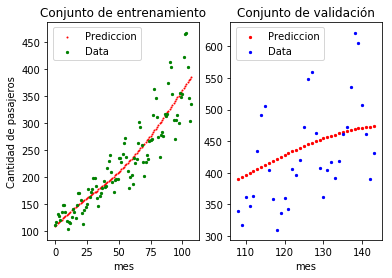

In [4]:
grado = 4

identity_size = grado + 1
x_tilda = np.array([x_tr, np.ones(len(x_tr))]).transpose()

for grado in range(2, grado + 1):
    x_tilda = np.append(np.array(np.power(x_tr,grado))[np.newaxis].transpose(), x_tilda, axis=1)

y_reg = y_tr

identidad = np.identity(identity_size)

def get_theta(rho):
    mul1 = np.linalg.inv(
        np.add(
            np.matmul(x_tilda.transpose(), x_tilda), 
            np.dot(identidad, rho)))
    mul2 = np.matmul(x_tilda.transpose(), y_reg)
    return np.matmul(mul1, mul2)

def poly(x, rho): 
    theta = get_theta(rho)
    print("Theta polyfit: ", np.polyfit(x_tr,y_reg, grado))
    print("Theta formula: ", get_theta(rho))
    
    p = np.poly1d(theta)
    return p(x)

#salida = recta(x_te, 0)
#pdb.set_trace()

rho = 0.25

#plt.figure()
#plt.scatter(x_tr,poly(x_tr, rho), c ='r')
#plt.scatter(x_tr,y_tr, c ='b')

#plt.figure()
#plt.scatter(x_te,poly(x_te, rho), c ='r')
#plt.scatter(x_te,y_te, c ='b')

f, figures = plt.subplots(1, 2)
figures[0].scatter(x_tr,poly(x_tr, rho), c ='r', s=1) 
figures[0].scatter(x_tr,y_tr, c='g', s=5)
figures[0].set_xlabel("mes")
figures[0].set_ylabel("Cantidad de pasajeros")
figures[0].set_title("Conjunto de entrenamiento")
figures[0].legend(["Prediccion","Data"], bbox_to_anchor=(0.65, 1))

figures[1].scatter(x_te,poly(x_te, rho), c ='r', s=5) 
figures[1].scatter(x_te,y_te, c='b', s=5) 
figures[1].set_xlabel("mes")
figures[1].set_title("Conjunto de validación")
figures[1].legend(["Prediccion","Data"], bbox_to_anchor=(0.65, 1))

plt.savefig('ajuste_poli.pdf')

def errorCuadratico(x, pred, labels):
    error2 = np.sum(np.power(np.absolute(np.subtract(labels, pred)), 2))
    
    return error2

print("")
print("El error cuadratico del train es: " + str(errorCuadratico(x_tr,poly(x_tr, rho), y_tr)))
print("")
print("El error cuadratico del test es: " + str(errorCuadratico(x_te,poly(x_te, rho), y_te)))

### iii)

In [5]:
#coefs_pol = [0.012, 1.22, 120]
coefs_pol = [-0.0000023, 0.00056, -0.034, 2.59, 109.27]

def f_pol_sin(x, theta):
    f_pol = np.poly1d(coefs_pol)
    
    return np.add(
        f_pol(x), 
        np.multiply(
            theta[0], 
            np.multiply(
                np.sin(
                    np.add(np.multiply(theta[1],x), 
                           theta[2])),
                np.exp(np.multiply(theta[3],x)))))

def cost_func(theta, x, y):
    f_pol_sin_aux = lambda t: f_pol_sin(t, theta)
    
    return np.sum(np.power(np.subtract(y, np.vectorize(f_pol_sin_aux)(x)), 2))

    
theta_1 = np.array([1, 0.55, 0.1, 0.01])

opt.minimize(cost_func, theta_1, args=(x_tr, y_tr), method='BFGS', tol=1e-9)

      fun: 36869.392580549065
 hess_inv: array([[ 2.93700220e-08,  5.45874342e-10, -2.57074640e-08,
        -1.82688441e-09],
       [ 5.45874342e-10,  9.28050636e-10, -3.68956054e-09,
        -2.48014827e-10],
       [-2.57074640e-08, -3.68956054e-09,  1.79079733e-07,
        -2.76714768e-09],
       [-1.82688441e-09, -2.48014827e-10, -2.76714768e-09,
         1.90296459e-09]])
      jac: array([ 0.        , -0.16308594, -0.00341797,  0.73681641])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1098
      nit: 92
     njev: 181
   status: 2
  success: False
        x: array([11.90460501,  0.52060465, -1.17650334,  0.01744125])

Graficamos el resultado de la optimización:


El error cuadratico del train es: 36869.3925805589

El error cuadratico del test es: 63331.68030167644


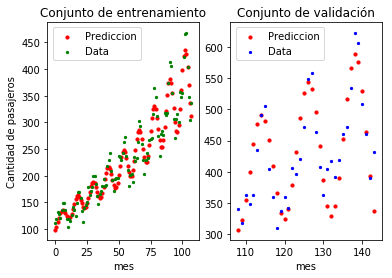

In [6]:
params_pol_sin = np.array([11.90460501,  0.52060465, -1.17650334,  0.01744125])

#pdb.set_trace()

f, figures = plt.subplots(1, 2)
figures[0].scatter(x_tr,f_pol_sin(x_tr, params_pol_sin), c ='r', s=10) 
figures[0].scatter(x_tr,y_tr, c='g', s=5)
figures[0].set_xlabel("mes")
figures[0].set_ylabel("Cantidad de pasajeros")
figures[0].set_title("Conjunto de entrenamiento")
figures[0].legend(["Prediccion","Data"], bbox_to_anchor=(0.65, 1))

figures[1].scatter(x_te,f_pol_sin(x_te, params_pol_sin), c ='r', s=10) 
figures[1].scatter(x_te,y_te, c='b', s=5) 
figures[1].set_xlabel("mes")
figures[1].set_title("Conjunto de validación")
figures[1].legend(["Prediccion","Data"], bbox_to_anchor=(0.65, 1))

plt.savefig('ajuste_pol_sin.pdf')

print("")
print("El error cuadratico del train es: " + str(errorCuadratico(x_tr,f_pol_sin(x_tr, params_pol_sin), y_tr)))
print("")
print("El error cuadratico del test es: " + str(errorCuadratico(x_te,f_pol_sin(x_te, params_pol_sin), y_te)))

### iv)

In [9]:
def f_theta_pol_sin_sin(x, theta):
    
    return np.add(
        f_pol_sin(x, params_pol_sin), 
        np.multiply(
            theta[0], 
            np.multiply(
                np.sin(
                    np.add(np.multiply(theta[1],x), 
                           theta[2])),
                np.exp(np.multiply(theta[3],x)))))

def cost_func_iv(theta, x, y):
    f_pol_sin_sin_aux = lambda t: f_theta_pol_sin_sin(t, theta)
    
    return np.sum(np.power(np.subtract(y, np.vectorize(f_pol_sin_sin_aux)(x)), 2))

theta_iv_init = np.array([-9.38821476, -1.05339533, -0.42300547,  0.0120188 ])

opt.minimize(cost_func_iv, theta_iv_init, args=(x_tr, y_tr), method='BFGS', tol=1e-9)

      fun: 14698.390011765636
 hess_inv: array([[ 1.34577940e-06,  6.93279471e-08, -3.76118711e-06,
        -2.86779789e-08],
       [ 6.93279471e-08,  1.29462473e-08, -4.85702101e-07,
        -1.74361082e-09],
       [-3.76118711e-06, -4.85702101e-07,  2.34400806e-05,
         1.16557964e-07],
       [-2.86779789e-08, -1.74361082e-09,  1.16557964e-07,
         2.96907548e-09]])
      jac: array([ 0.        ,  0.00085449, -0.00012207,  0.00195312])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 355
      nit: 7
     njev: 58
   status: 2
  success: False
        x: array([-9.38821476, -1.05339533, -0.42300547,  0.0120188 ])


El error cuadratico del train es: 14698.390011766633

El error cuadratico del test es: 40144.47010593598


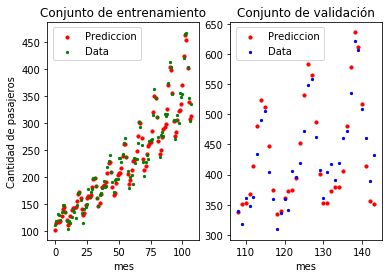

In [11]:
params_pol_sin_sin = np.array([-9.38821476, -1.05339533, -0.42300547,  0.0120188])

f, figures = plt.subplots(1, 2)
figures[0].scatter(x_tr,f_theta_pol_sin_sin(x_tr, params_pol_sin_sin), c ='r', s=10) 
figures[0].scatter(x_tr,y_tr, c='g', s=5)
figures[0].set_xlabel("mes")
figures[0].set_ylabel("Cantidad de pasajeros")
figures[0].set_title("Conjunto de entrenamiento")
figures[0].legend(["Prediccion","Data"], bbox_to_anchor=(0.65, 1))

figures[1].scatter(x_te,f_theta_pol_sin_sin(x_te, params_pol_sin_sin), c ='r', s=10) 
figures[1].scatter(x_te,y_te, c='b', s=5) 
figures[1].set_xlabel("mes")
figures[1].set_title("Conjunto de validación")
figures[1].legend(["Prediccion","Data"], bbox_to_anchor=(0.65, 1))

print("")
print("El error cuadratico del train es: " + str(errorCuadratico(x_tr,f_theta_pol_sin_sin(x_tr, params_pol_sin_sin), y_tr)))
print("")
print("El error cuadratico del test es: " + str(errorCuadratico(x_te,f_theta_pol_sin_sin(x_te, params_pol_sin_sin), y_te)))